#Project_Major(Acadamour)

In [ ]:
from pandas.io.formats.style_render import import_optional_dependency
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#EDA(Exploratory Data Analysis)

In [ ]:
df = pd.read_csv("/content/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.shape

(1338, 7)

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
print(f'age : {df.age.count()}')
print(f'sex : {df.sex.count()}')
print(f'bmi : {df.bmi.count()}')
print(f'children : {df.children.count()}')
print(f'smoker : {df.smoker.count()}')
print(f'charges : {df.charges.count()}')
print(f'region : {df.region.count()}')

age : 1338
sex : 1338
bmi : 1338
children : 1338
smoker : 1338
charges : 1338
region : 1338


In [ ]:
print("Number of unique values in each catogary  :")
print(f'age : {df.age.nunique()}')
print(f'sex : {df.sex.nunique()}')
print(f'bmi : {df.bmi.nunique()}')
print(f'children : {df.children.nunique()}')

print(f'smoker : {df.smoker.nunique()}')
print(f'charges : {df.charges.nunique()}')
print(f'region : {df.region.nunique()}')

Number of unique values in each catogary  :
age : 47
sex : 2
bmi : 548
children : 6
smoker : 2
charges : 1337
region : 4


In [ ]:
print("Type of values in each catogary  :")
print(f'age : {df.age.dtype}')
print(f'sex : {df.sex.dtype}')
print(f'bmi : {df.bmi.dtype}')
print(f'children : {df.children.dtype}')
print(f'smoker : {df.smoker.dtype}')
print(f'charges : {df.charges.dtype}')
print(f'region : {df.region.dtype}')

Type of values in each catogary  :
age : int64
sex : object
bmi : float64
children : int64
smoker : object
charges : float64
region : object


In [ ]:
print(f'min : {df.charges.min()}')
print(f'max : {df.charges.max()}')
print(f'quantile(25%) : {df.charges.quantile(0.25)}')
print(f'quantile(50%) : {df.charges.quantile(0.50)}')
print(f'quantile(75%) : {df.charges.quantile(0.75)}')
print(f'mean : {df.charges.mean()}')
print(f'mode : {df.charges.mode().values[0]}')
print(f'median : {df.charges.median()}')
print(f'Standard Deviation : {df.charges.std()}')

min : 1121.8739
max : 63770.42801
quantile(25%) : 4740.28715
quantile(50%) : 9382.033
quantile(75%) : 16639.912515
mean : 13270.422265141257
mode : 1639.5631
median : 9382.033
Standard Deviation : 12110.011236694001


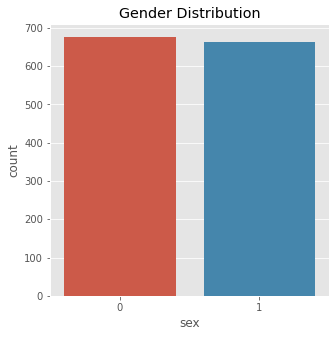

In [ ]:
plt.figure(figsize=(5,5))
plt.style.use('ggplot')
sns.countplot(x='sex',data=df)
plt.title('Gender Distribution')
plt.show()

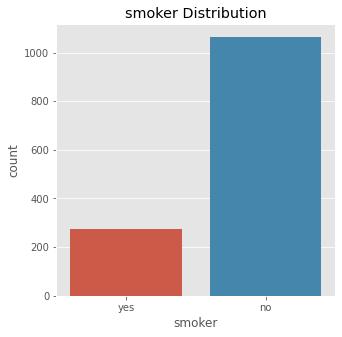

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x='smoker',data=df)
plt.title('smoker Distribution')
plt.show()

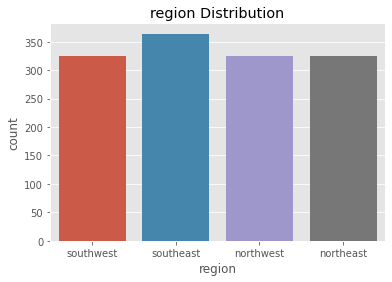

In [ ]:
#plt.figure(figsize=(5,5))
sns.countplot(x='region',data=df)
plt.title('region Distribution')
plt.show()

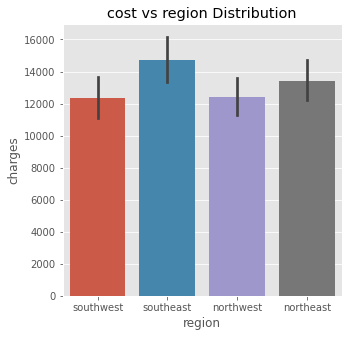

In [ ]:
plt.figure(figsize=(5,5))
sns.barplot(x='region',y='charges',data=df)
plt.title('cost vs region Distribution')
plt.show()

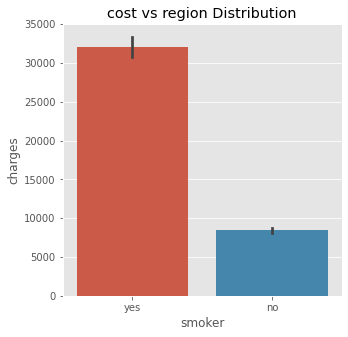

In [ ]:
print("\n")
plt.figure(figsize=(5,5))
sns.barplot(x='smoker',y='charges',data=df)
plt.title('cost vs region Distribution')
plt.show()

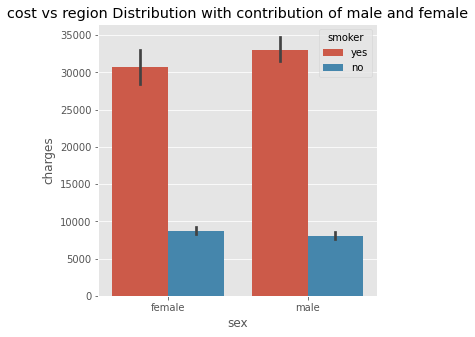

In [ ]:
plt.figure(figsize=(5,5))
sns.barplot(x='sex',y='charges',hue='smoker',data=df)
plt.title('cost vs region Distribution with contribution of male and female')
plt.show()

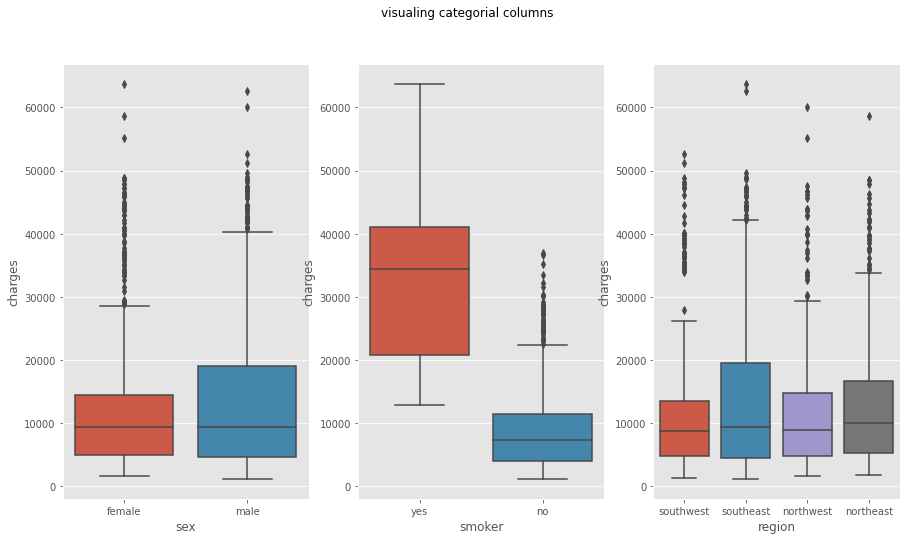

In [ ]:
fig, axes = plt.subplots(1,3,figsize=(15,8))
fig.suptitle('visualing categorial columns')
sns.boxplot(x='sex',y='charges',data = df,ax= axes[0])
sns.boxplot(x='smoker',y='charges',data = df,ax= axes[1])
sns.boxplot(x='region',y='charges',data = df,ax= axes[2])
plt.show()

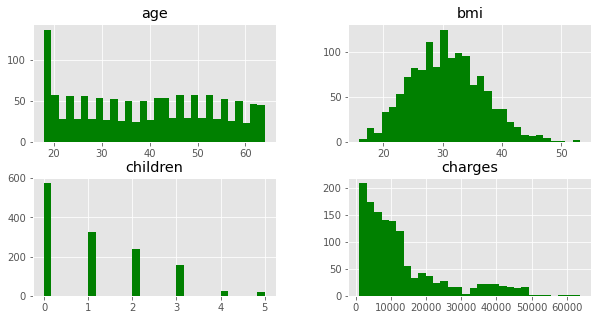

In [ ]:
df[['age','bmi','children','charges']].hist(bins=30,figsize=(10,5),color='green')
plt.show()

In [ ]:
df['sex'] = df['sex'].apply({'male': 0 ,'female' : 1}.get)

In [ ]:
df['region'] = df['region'].apply({'southwest':1 ,'southeast' : 2 ,'northwest' : 3,'northeast' : 4}.get)
df['smoker'] = df['smoker'].apply({'yes': 1 ,'no' : 0}.get)

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


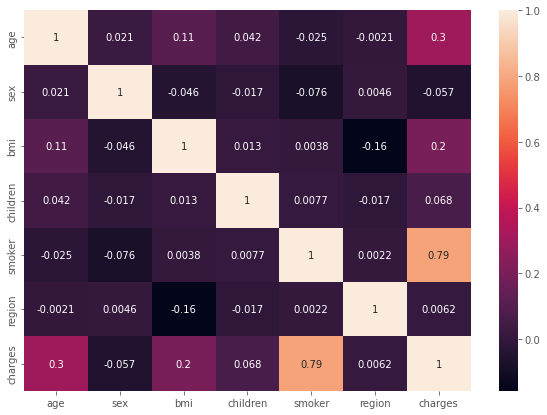

In [ ]:
plt.figure(figsize = (10,7))
sns.heatmap(df.corr() , annot =True)
plt.show()

Lighter values are more correlated while darker values are less correlated.

so we can concluled that:
1.   from above heatmap that smoker attribute have very high correlation (0.79) with target variable (i.e. cost/charges)
2.   while sex attribute have very low correlation (-0.057) with target variable
(i.e. cost/charges)


#Linear Regression Model

We can drop 'sex' columns as they have very low correlation

In [ ]:
X = df.drop(['charges','sex'],axis=1)
Y = df.charges

In [ ]:
X.head()

,age,bmi,children,smoker,region
0,19,27.900,0,1,1
1,18,33.770,1,0,2
2,28,33.000,3,0,2
3,33,22.705,0,0,3
4,32,28.880,0,0,3


In [ ]:
Y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

#### Slpitting data in Testing and training

In [ ]:
from pandas.core.common import random_state
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
print("X_train shape :",X_train.shape)
print("X_test shape :",X_test.shape)
print("Y_train shape :",Y_train.shape)
print("Y_test shape :",Y_test.shape)

X_train shape : (1070, 5)
X_test shape : (268, 5)
Y_train shape : (1070,)
Y_test shape : (268,)


In [ ]:
LR = LinearRegression()

In [ ]:
LR.fit(X_train,Y_train)
Y_pred = LR.predict(X_test)

#Accuracy of Model

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
print(r2_score(Y_test,Y_pred))

0.7833112270019789


Therefore accuracy of model is 0.7697211527941855

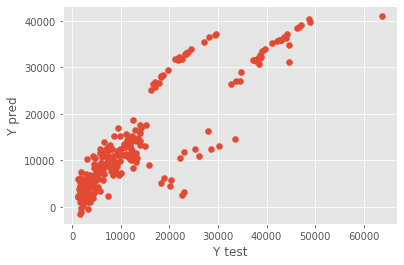

In [ ]:
plt.scatter(Y_test,Y_pred)
plt.xlabel('Y test')
plt.ylabel('Y pred')
plt.show()

#Predicting Insurance Cost For A New Costumer

In [ ]:
#Costumer 1 who is smoker
data1 = {'age': 45, 'bmi': 25,'children':2, 'smoker':1,'region':1}
index= [0]
cust_df = pd.DataFrame(data1,index)
cust_df

,age,bmi,children,smoker,region
0,45,25,2,1,1


In [ ]:
cost_pred = LR.predict(cust_df)
print("Predicted insurance cost for coustumor is",cost_pred)

Predicted insurance cost for coustumor is [31689.0063168]


In [ ]:
#Costumer 2 who is not a smoker
data2 = {'age': 45, 'bmi': 25,'children':2, 'smoker':0,'region':1}
index= [0]
cust_df = pd.DataFrame(data2,index)
cust_df

,age,bmi,children,smoker,region
0,45,25,2,0,1


In [ ]:
cost_pred = LR.predict(cust_df)
print("Predicted insurance cost for coustumor is",cost_pred)

Predicted insurance cost for coustumor is [8042.81875462]


As we can see Costumer 1 who is smoker have high insurance predicted (i.e.31570.6993523) by this model.
while for Costumer 2 who is not a smoker have less insurance predicted (i.e.7943.63684005) by this model.